# Data Exploration - 3-Class Emotion Classification

Exploring the GoEmotions dataset with 3-class emotion mapping: positive, negative, and neutral.


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
os.makedirs('../results/figures', exist_ok=True)


## Load Data


In [2]:
train_df = pd.read_csv('../data/raw/train_raw.csv')
val_df = pd.read_csv('../data/raw/val_raw.csv')
test_df = pd.read_csv('../data/raw/test_raw.csv')

print(f"Train: {train_df.shape}")
print(f"Val: {val_df.shape}")
print(f"Test: {test_df.shape}")
print(f"Total: {len(train_df) + len(val_df) + len(test_df):,}")


Train: (43410, 2)
Val: (5426, 2)
Test: (5427, 2)
Total: 54,263


## 3-Class Emotion Mapping


In [3]:
mapping_7_to_3 = {
    'anger': 'negative',
    'disgust': 'negative',
    'fear': 'negative',
    'sadness': 'negative',
    'joy': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral'
}

print("3-Class Emotion Mapping:")
print("  Positive: joy")
print("  Negative: anger + disgust + fear + sadness")
print("  Neutral: neutral + surprise")
print("\nMapping details:")
for original, mapped in mapping_7_to_3.items():
    print(f"  {original:10s} -> {mapped}")


3-Class Emotion Mapping:
  Positive: joy
  Negative: anger + disgust + fear + sadness
  Neutral: neutral + surprise

Mapping details:
  anger      -> negative
  disgust    -> negative
  fear       -> negative
  sadness    -> negative
  joy        -> positive
  neutral    -> neutral
  surprise   -> neutral


## Apply 3-Class Mapping


In [4]:
train_df['emotion_3class'] = train_df['emotion'].map(mapping_7_to_3)
val_df['emotion_3class'] = val_df['emotion'].map(mapping_7_to_3)
test_df['emotion_3class'] = test_df['emotion'].map(mapping_7_to_3)

print("Mapping applied to all datasets")


Mapping applied to all datasets


## Basic Data Check


In [5]:
train_df.head()


,text,emotion,emotion_3class
0,My favourite food is anything I didn't have to...,neutral,neutral
1,"Now if he does off himself, everyone will thin...",neutral,neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger,negative
3,To make her feel threatened,fear,negative
4,Dirty Southern Wankers,anger,negative


In [6]:
print("Missing values:")
print(train_df.isnull().sum().sum())
print("\nDuplicates:")
print(f"Train: {train_df.duplicated().sum()}")
print(f"Val: {val_df.duplicated().sum()}")
print(f"Test: {test_df.duplicated().sum()}")


Missing values:
0

Duplicates:
Train: 146
Val: 3
Test: 5


## Original 7-Class Distribution


In [7]:
emotion_counts_7 = train_df['emotion'].value_counts()
emotion_percentages_7 = train_df['emotion'].value_counts(normalize=True) * 100

emotion_df_7 = pd.DataFrame({
    'Count': emotion_counts_7,
    'Percentage': emotion_percentages_7.round(2)
})
print("Original 7-class distribution:")
print(emotion_df_7)


Original 7-class distribution:
          Count  Percentage
emotion                    
neutral   23283       53.64
joy        9076       20.91
anger      5336       12.29
sadness    2371        5.46
surprise   2149        4.95
fear        615        1.42
disgust     580        1.34


## 3-Class Distribution


In [8]:
emotion_counts_3 = train_df['emotion_3class'].value_counts()
emotion_percentages_3 = train_df['emotion_3class'].value_counts(normalize=True) * 100

emotion_df_3 = pd.DataFrame({
    'Count': emotion_counts_3,
    'Percentage': emotion_percentages_3.round(2)
})
print("3-class distribution:")
print(emotion_df_3)


3-class distribution:
                Count  Percentage
emotion_3class                   
neutral         25432       58.59
positive         9076       20.91
negative         8902       20.51


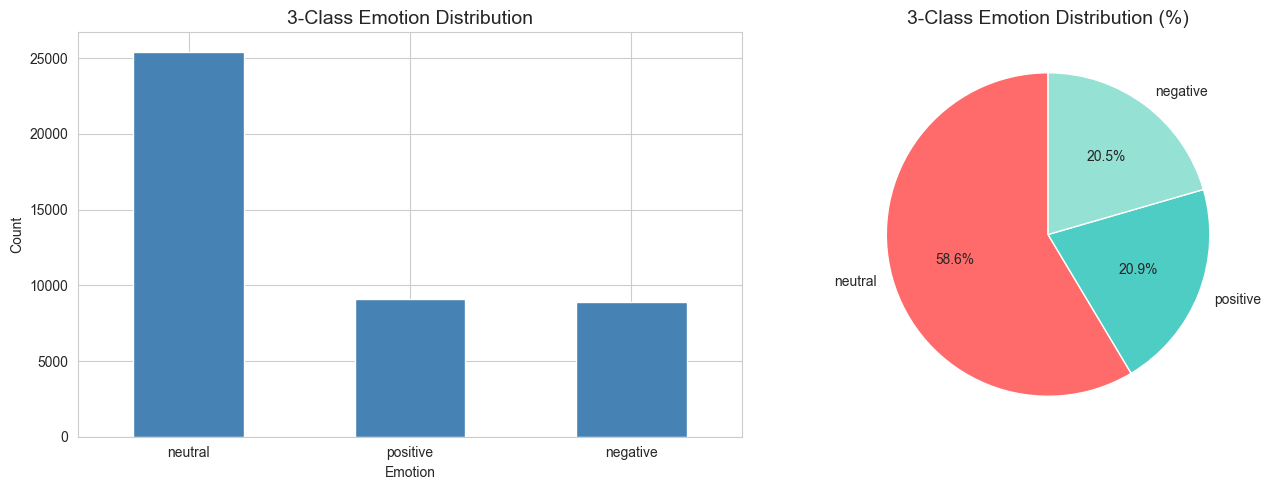

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

emotion_counts_3.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('3-Class Emotion Distribution', fontsize=14)
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

colors = ['#ff6b6b', '#4ecdc4', '#95e1d3']
axes[1].pie(emotion_counts_3, labels=emotion_counts_3.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('3-Class Emotion Distribution (%)', fontsize=14)

plt.tight_layout()
plt.savefig('../results/figures/emotion_distribution_3class.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
max_count = emotion_counts_3.max()
min_count = emotion_counts_3.min()
imbalance_ratio = max_count / min_count

print(f"Most common: {emotion_counts_3.idxmax()} ({max_count:,} samples)")
print(f"Least common: {emotion_counts_3.idxmin()} ({min_count:,} samples)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("Note: Class imbalance detected - will balance during preprocessing")


Most common: neutral (25,432 samples)
Least common: negative (8,902 samples)
Imbalance ratio: 2.86:1
Note: Class imbalance detected - will balance during preprocessing


## Breakdown by Original Classes


In [11]:
breakdown = train_df.groupby('emotion_3class')['emotion'].value_counts().unstack(fill_value=0)
print("Breakdown of 3-class emotions by original 7 classes:")
print(breakdown)


Breakdown of 3-class emotions by original 7 classes:
emotion         anger  disgust  fear   joy  neutral  sadness  surprise
emotion_3class                                                        
negative         5336      580   615     0        0     2371         0
neutral             0        0     0     0    23283        0      2149
positive            0        0     0  9076        0        0         0


## Text Length Analysis


In [12]:
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

print("Text length statistics:")
print(train_df[['text_length', 'word_count']].describe())


Text length statistics:
        text_length    word_count
count  43410.000000  43410.000000
mean      68.400875     12.840175
std       36.721898      6.701597
min        2.000000      1.000000
25%       38.000000      7.000000
50%       65.000000     12.000000
75%       96.000000     18.000000
max      703.000000     33.000000


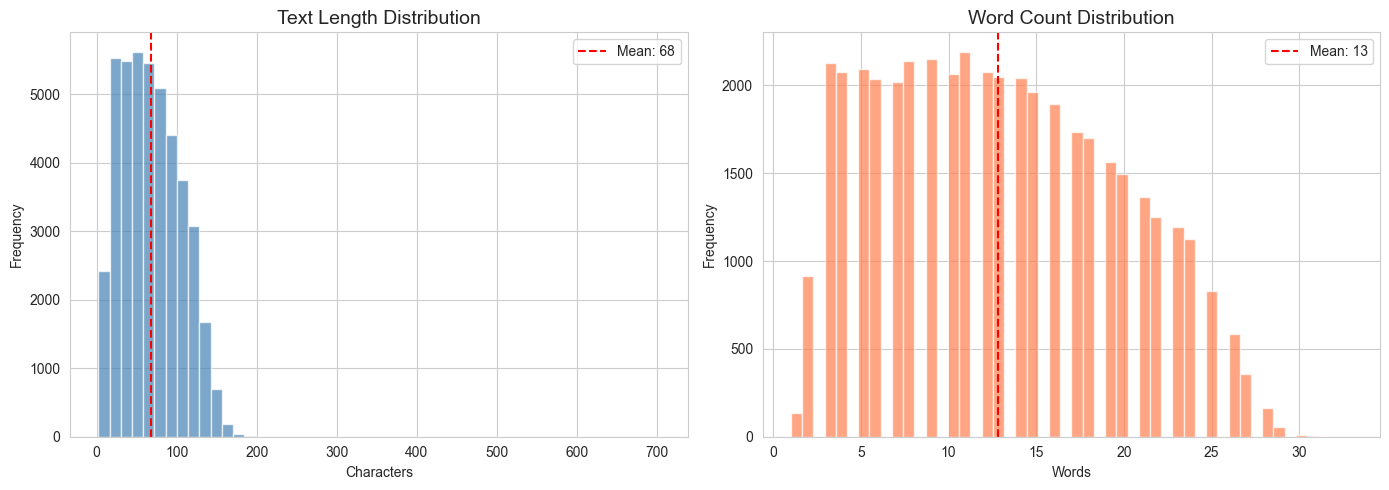

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['text_length'], bins=50, color='steelblue', alpha=0.7)
axes[0].set_title('Text Length Distribution', fontsize=14)
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["text_length"].mean():.0f}')
axes[0].legend()

axes[1].hist(train_df['word_count'], bins=50, color='coral', alpha=0.7)
axes[1].set_title('Word Count Distribution', fontsize=14)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/figures/text_length_analysis_3class.png', dpi=300, bbox_inches='tight')
plt.show()


## Sample Texts by 3-Class Emotion


In [14]:
for emotion in sorted(train_df['emotion_3class'].unique()):
    print(f"\n{emotion.upper()}:")
    samples = train_df[train_df['emotion_3class'] == emotion]['text'].sample(n=3, random_state=42)
    for i, text in enumerate(samples, 1):
        original_emotion = train_df[train_df['text'] == text]['emotion'].iloc[0]
        print(f"  {i}. [{original_emotion}] {text}")



NEGATIVE:
  1. [anger] Please point out my fallacious line of reasoning instead of insulting my intelligence. You are an example of a bigot that thinks he is wiser than everyone else.
  2. [sadness] I think you also underestimate how big Chelsea has become, especially in the States
  3. [anger] I hate roundabouts. For some reason road designers have a fetish for them as more and more are popping up. For cyclist they are rings of death

NEUTRAL:
  1. [surprise] Holy shit I didn’t realize he didn’t fumble all season that’s wild
  2. [neutral] Tics can have a variety of causes, Tourettes' are caused by certain neurotransmitters in the brain not working properly. 
  3. [surprise] Wait, wut? I thought there was some sort of (2) term pledge from

POSITIVE:
  1. [joy] Funny how you're implying he'd even have a chance against [NAME]
  2. [joy] Lol same actually
  3. [joy] This is actually kinda funny


## Dataset Split Comparison


                Train (%)  Val (%)  Test (%)
emotion_3class                              
negative            20.51    20.55     21.45
neutral             58.59    56.97     58.12
positive            20.91    22.48     20.43


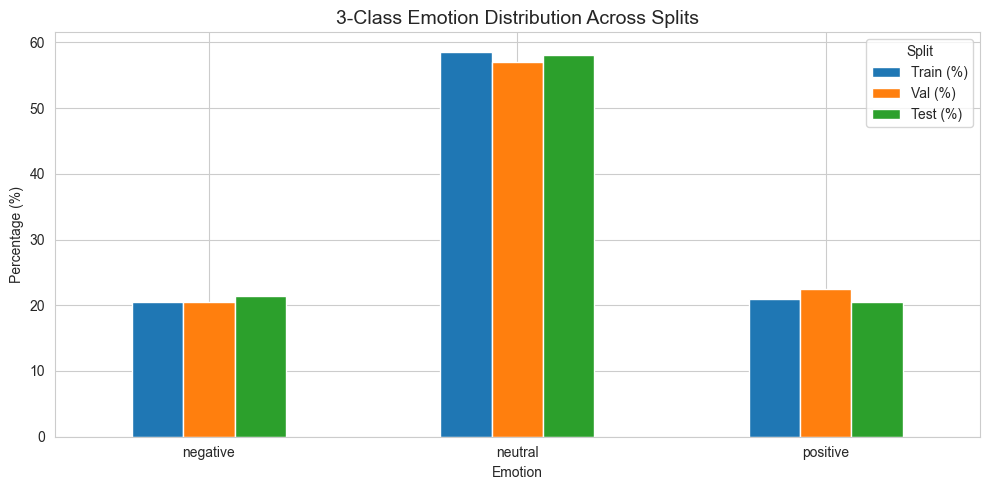

In [15]:
train_dist = train_df['emotion_3class'].value_counts(normalize=True).sort_index() * 100
val_dist = val_df['emotion_3class'].value_counts(normalize=True).sort_index() * 100
test_dist = test_df['emotion_3class'].value_counts(normalize=True).sort_index() * 100

comparison_df = pd.DataFrame({
    'Train (%)': train_dist,
    'Val (%)': val_dist,
    'Test (%)': test_dist
}).round(2)

print(comparison_df)

comparison_df.plot(kind='bar', figsize=(10, 5))
plt.title('3-Class Emotion Distribution Across Splits', fontsize=14)
plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Split')
plt.tight_layout()
plt.savefig('../results/figures/split_comparison_3class.png', dpi=300, bbox_inches='tight')
plt.show()


## Summary


In [16]:
print("3-Class Dataset Summary:")
print(f"Total samples: {len(train_df) + len(val_df) + len(test_df):,}")
print(f"Training: {len(train_df):,} | Validation: {len(val_df):,} | Test: {len(test_df):,}")
print(f"\nEmotions: {len(emotion_counts_3)} classes (reduced from 7)")
print(f"Most common: {emotion_counts_3.idxmax()} ({emotion_counts_3.max():,})")
print(f"Least common: {emotion_counts_3.idxmin()} ({emotion_counts_3.min():,})")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"\nAvg text length: {train_df['text_length'].mean():.0f} chars, {train_df['word_count'].mean():.1f} words")
print(f"Missing values: {train_df.isnull().sum().sum()}")
print(f"Duplicates: {train_df.duplicated().sum()}")


3-Class Dataset Summary:
Total samples: 54,263
Training: 43,410 | Validation: 5,426 | Test: 5,427

Emotions: 3 classes (reduced from 7)
Most common: neutral (25,432)
Least common: negative (8,902)
Imbalance ratio: 2.86:1

Avg text length: 68 chars, 12.8 words
Missing values: 0
Duplicates: 146
